In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from chip_analysis.box_filter import BoxFilter

In [3]:
data = Path.cwd().parent / "data"
examples = list(data.iterdir())

In [4]:
bf = BoxFilter(examples[3])

In [7]:
bf.filter()

Commencing image processing...
  1/4 - Removing outliers...
  2/4 - Removing outliers...
  3/4 - Culling boundary pixel...
  4/4 - Aspect ratio filter...


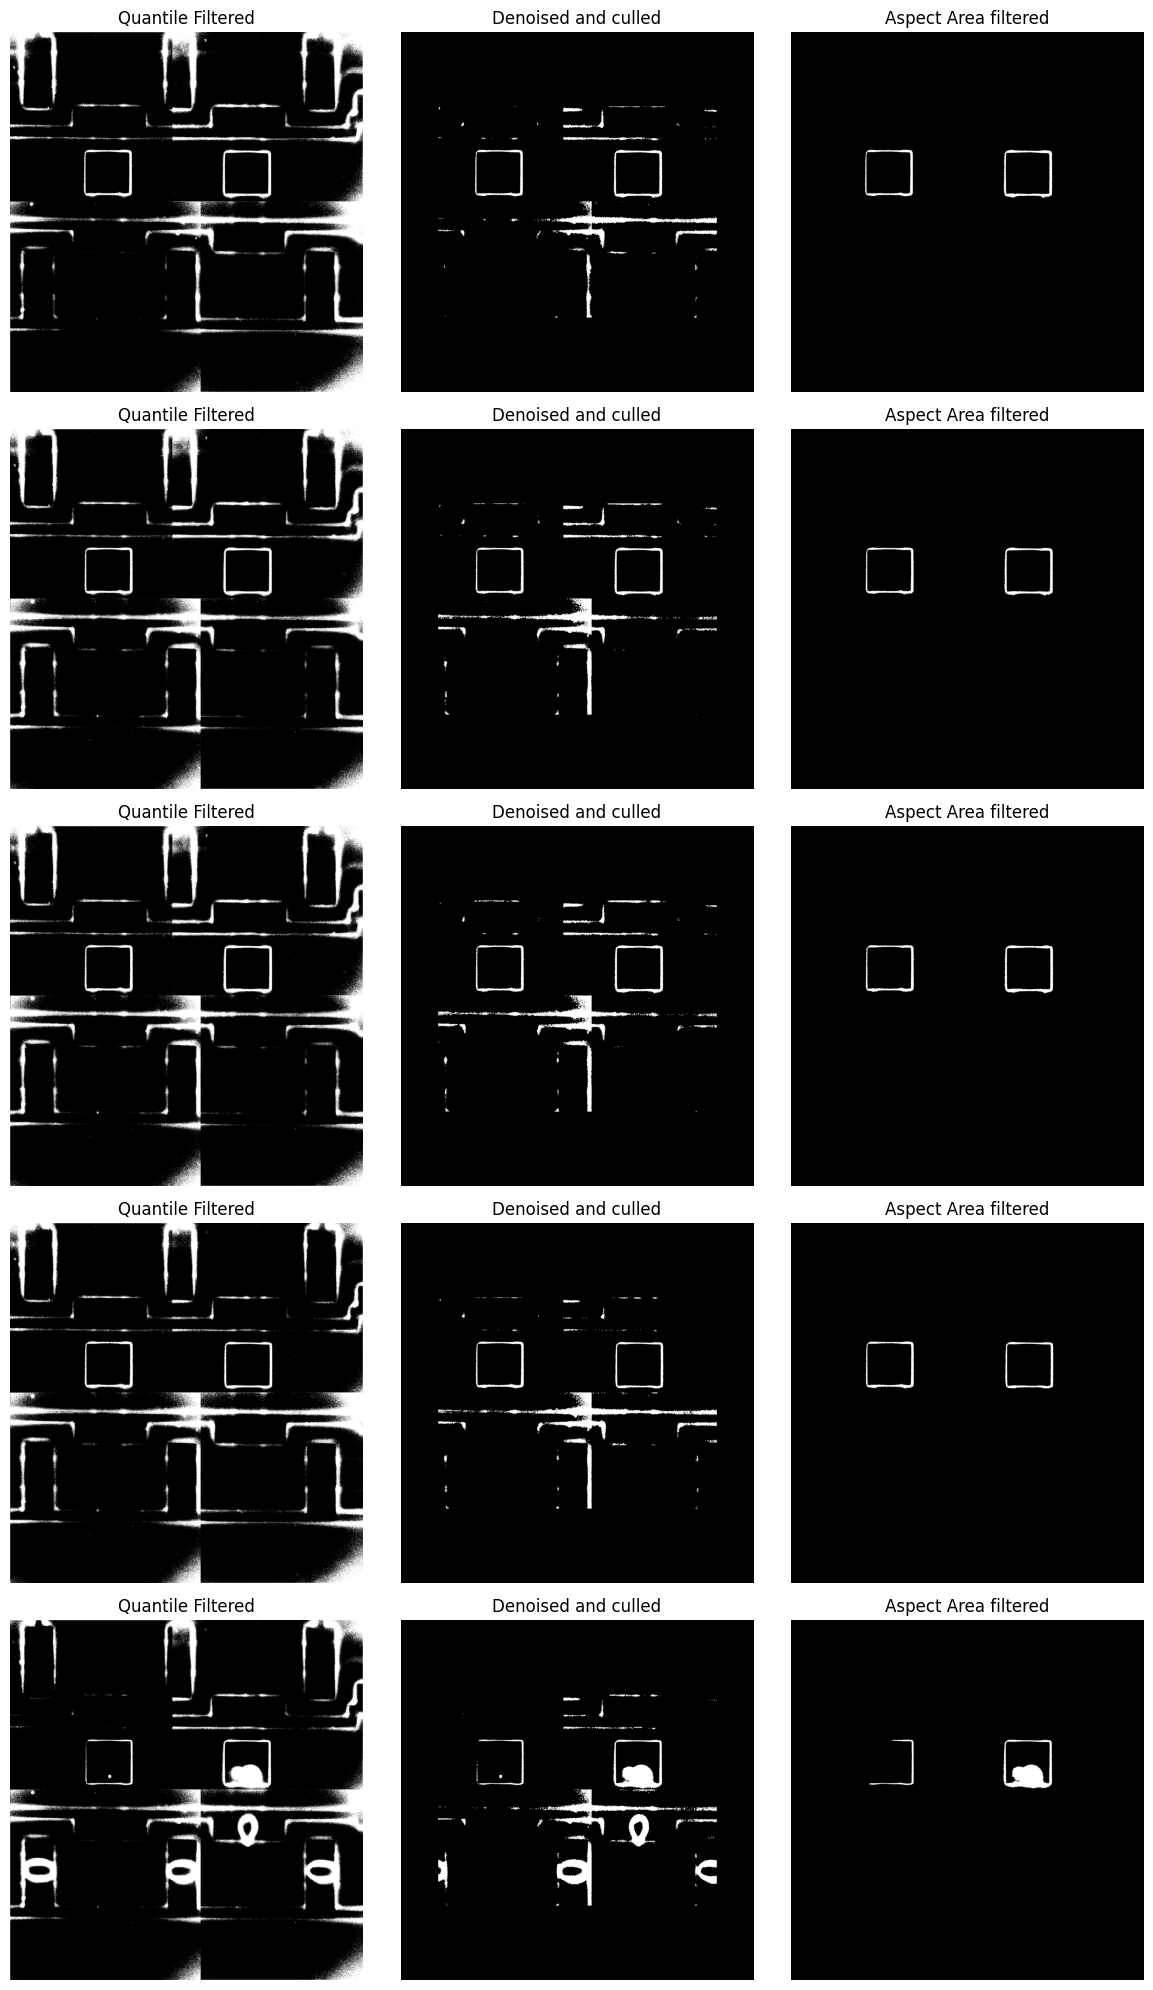

In [10]:
bf.visualise()

# Development

In [9]:
import numpy as np
import scipy.ndimage as nd

np.float64(27131.0)

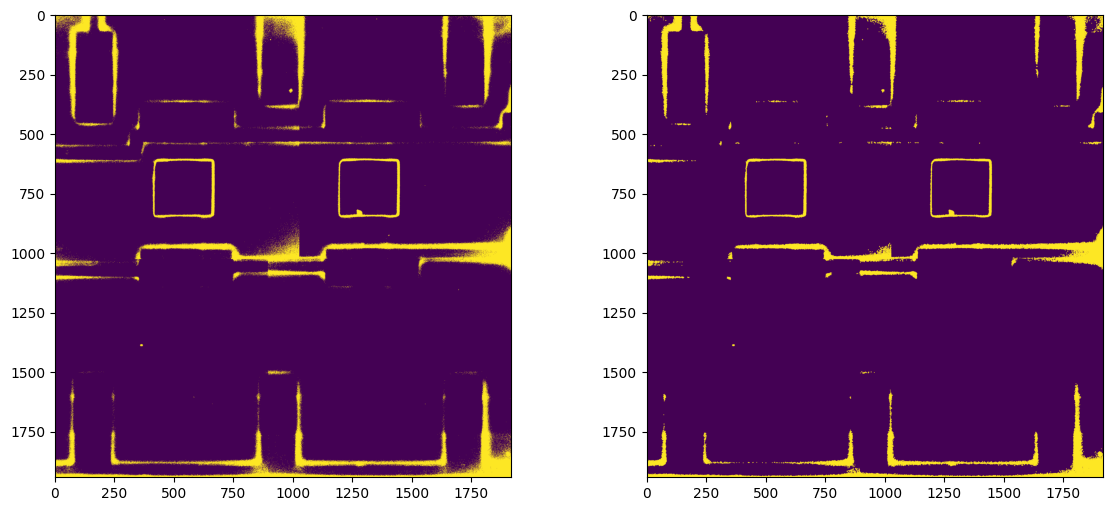

In [10]:
bf = BoxFilter(examples[7])
img = bf.imgs[1,:,:]
threshold = np.quantile(img, 0.075)
img[img < threshold] = 0
img[img > 0] = 1
img = 1 - img

_, axes = plt.subplots(1, 2, figsize=(14, 6)) 
axes[0].imshow(img)
opening = nd.binary_opening(img, structure = nd.generate_binary_structure(2, 2), iterations=1)
# smoothed = nd.binary_dilation(opening, iterations = 1)
axes[1].imshow(opening)
threshold

In [ ]:

        for n in range(imgs.shape[0]):
            s = nd.generate_binary_structure(2,2)
            labelled, _ = nd.label(imgs[n,:,:], structure=s)
            for indices in nd.value_indices(labelled).values():
                # Remove regions larger or smaller than a pixel threshold
                if indices[0].size < tSmall or indices[0].size > tLarge:
                    imgs[n,indices] = 0

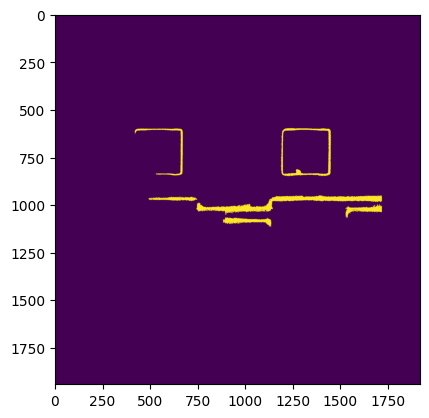

In [22]:
imgs = np.copy(bf._culled)
for n in range(imgs.shape[0]):
    s = nd.generate_binary_structure(2, 2)
    labelled, _ = nd.label(imgs[n,:,:], structure=s)
    for indices in nd.value_indices(labelled).values():
    #     # Remove regions larger or smaller than a pixel threshold
        if indices[0].size < 2500 or indices[0].size > 50_000:
            imgs[n, *indices] = 0
plt.imshow(imgs[n,:,:])

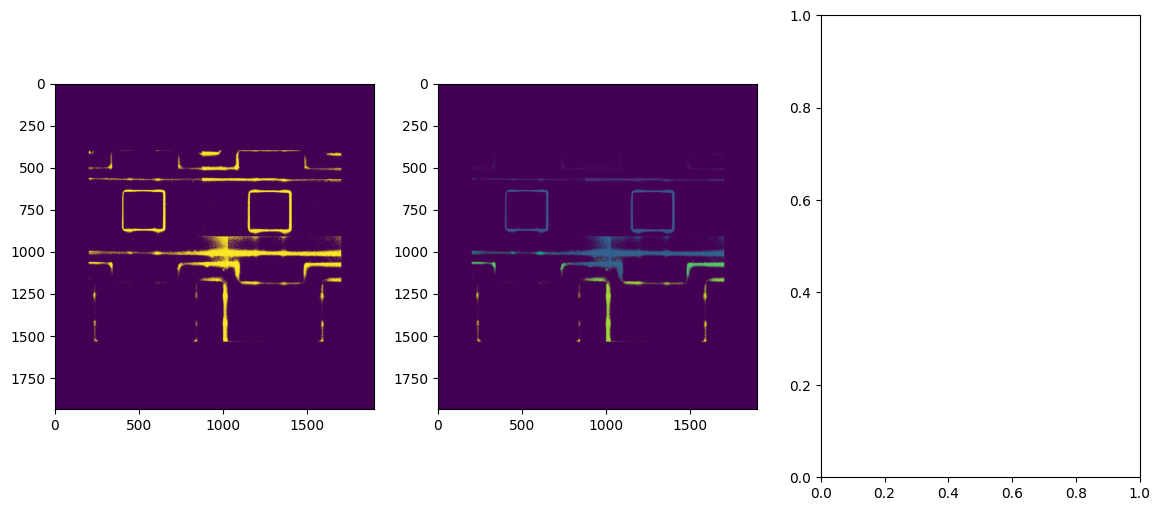

In [10]:
_, axes = plt.subplots(1, 3, figsize=(14, 6)) 

img = np.copy(bf._2_culled[0,:,:])
tSmall, tLarge = bf.config.pixelSizeThresholds
s = nd.generate_binary_structure(2,2)
labelled, nLabels = nd.label(img)#, structure=s)

axes[0].imshow(img)

axes[1].imshow(labelled)

test = nd.labeled_comprehension(img, labelled, nLabels, lambda x: x.size, float, 0)
# axes[2].imshow(img)
# axes[2].colorbar()

plt.show()